### Number Plate Detection 

In [ ]:
import cv2
import matplotlib.pyplot as plt 
color = (200,252,255) # The color of The Contour of the ROI

height , width : (225, 225, 3)


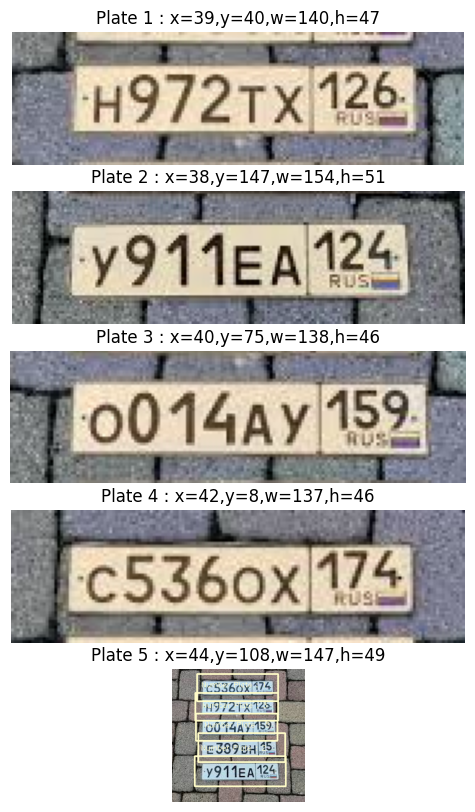

In [3]:
## Understanding the Output of the CascadeClassifier

imagePlate =cv2.imread("5Plates.jpg",1)
imgCopy = imagePlate.copy()
print(f"height , width : {imagePlate.shape}")

plateCascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
plates =plateCascade.detectMultiScale(image=imgCopy, scaleFactor=1.1, minNeighbors=6)

# Determine the ROI
fig , axes = plt.subplots(5,1,figsize=(10,10))
for i,(x,y,w,h) in enumerate(plates):
    # Show the ROI
    roiPlate = imagePlate[y:y+h,x-10:x+w+10]
    axes[i].imshow(roiPlate)
    axes[i].title.set_text(f"Plate {i+1} : x={x},y={y},w={w},h={h}") 
    axes[i].axis('off')


    # Draw the ROI on the Copyed Image
    cv2.rectangle(imgCopy,(x,y),(x+w,y+h),color,2)
    cv2.putText(imgCopy,f"Number Plate : {i+1}",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.4,color,1)
    plt.imshow(cv2.cvtColor(imgCopy,cv2.COLOR_BGR2RGB))
plt.show()

#cv2.rectangle(imgCopy,(x,y),(x+w,y+h),color,2)
#cv2.putText(imgCopy,"Number Plate",(x+20,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,color,2)



### Try the Detection of The Car Plate on a Video 

* Now after we've tested this Functionality on an Image , let's Try it on a real Time Video (Using My Phone)

In [10]:
## Define a function that acepts an image ->> return a modified image ,and the ROI of the number plate
def get_plate(image):
    imgCopy = image.copy()
    cv2.cvtColor(imgCopy,cv2.COLOR_BGR2GRAY)

    # Define A list of ROI plates
    ROIplates = []
    plates =plateCascade.detectMultiScale(image=imgCopy, scaleFactor=1.1, minNeighbors=7)
    for i,(x,y,w,h) in enumerate(plates):
        area = w*h
        if area > 500:
            cv2.rectangle(imgCopy,(x,y),(x+w,y+h),color,2)
            cv2.putText(imgCopy,f"Number Plate : {i+1}",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.4,color,1)
            roiPlate = image[y:y+h,x:x+w]
            ROIplates.append(roiPlate)
    return ROIplates , imgCopy
    

#### Testing the Function get_plate before using it on My Camera 

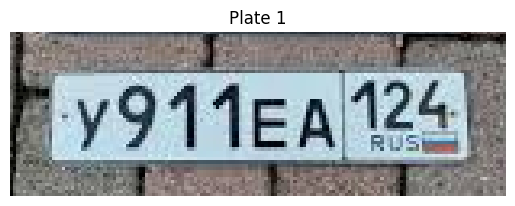

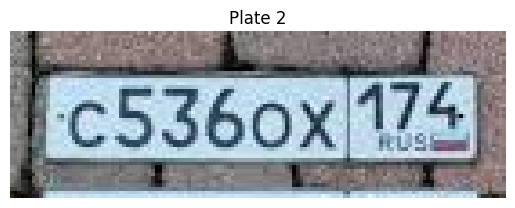

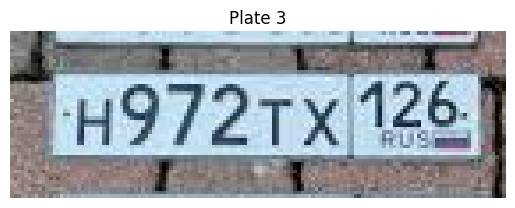

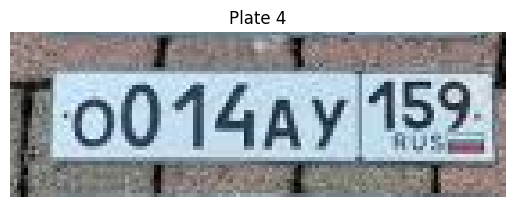

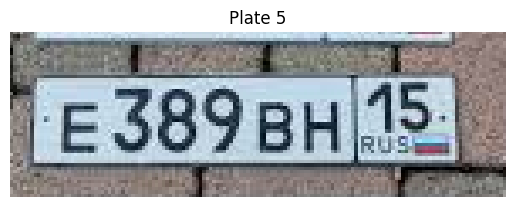

In [5]:
roiPlate ,  imgCopy = get_plate(imagePlate)

for i,plate in enumerate(roiPlate):
    plt.imshow(cv2.cvtColor(plate,cv2.COLOR_BGR2RGB))
    plt.title(f"Plate {i+1}")
    plt.axis('off')
    plt.show()

### Real Time Plate Detection Using the camera 

In [7]:
count = 0

In [12]:
frameWidth = 640
frameHeight = 480
cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, frameWidth)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frameHeight)

while True:
    success, img = cap.read()
    ROIPlates , imgCopy = get_plate(img)
    cv2.imshow("Plates", imgCopy)
    if len(ROIPlates) != 0:
        cv2.imshow("ROI", ROIPlates[0])
        # If Iwant to save The ROI Detected when i press the "s" key : 
        if cv2.waitKey(1) & 0xFF == ord('s'):
            cv2.imwrite(f"./Plates/ROI_Number_Plate_{count}.jpg",ROIPlates[0])
            # Feed Back That is Saved Correctly 
            cv2.rectangle(imgCopy,(0,200),(640,300),(0,255,0),-1)
            cv2.putText(imgCopy,"Saved",(150,275),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2) 
            cv2.imshow("Plates", imgCopy)
            cv2.waitKey(1000)
            count += 1


    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        cap.release()
        break